In [2]:
#imports

from PIL import Image
import os
from pathlib import Path
import argparse
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report

from one_g import WT3Net,WaterLevelDataset,ToTensor


Filename : deploy/input/13-57-22.jpg


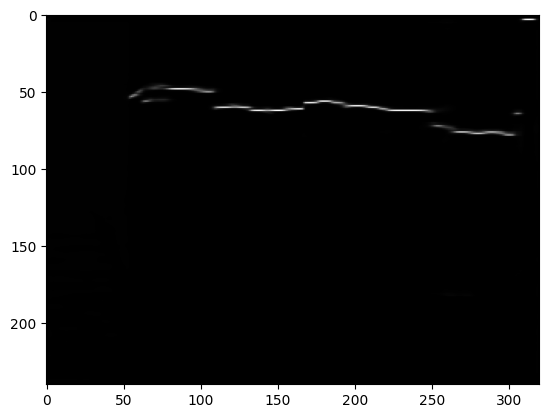

Filename : deploy/input/15-50-31.jpg


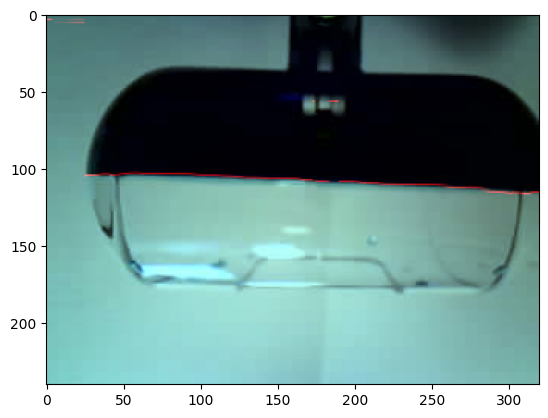

Filename : deploy/input/15-50-36.jpg


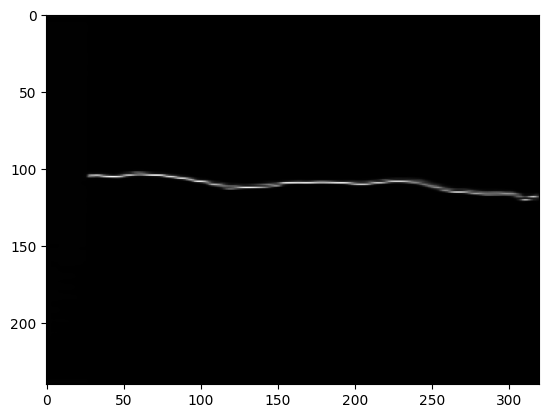

Filename : deploy/input/15-50-38.jpg


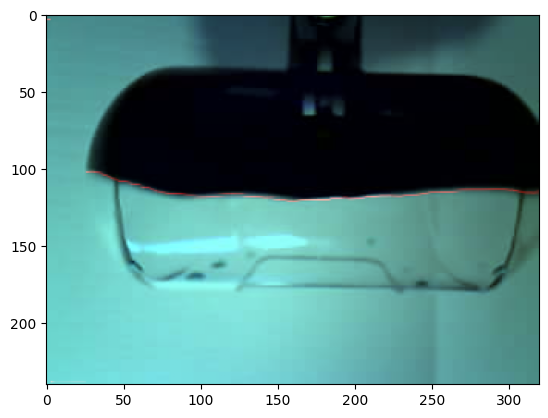

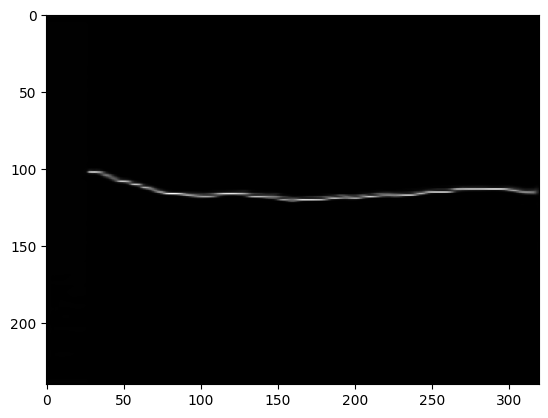

Filename : deploy/input/15-57-33.jpg


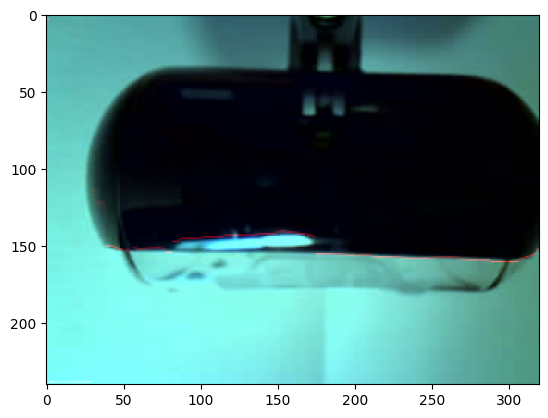

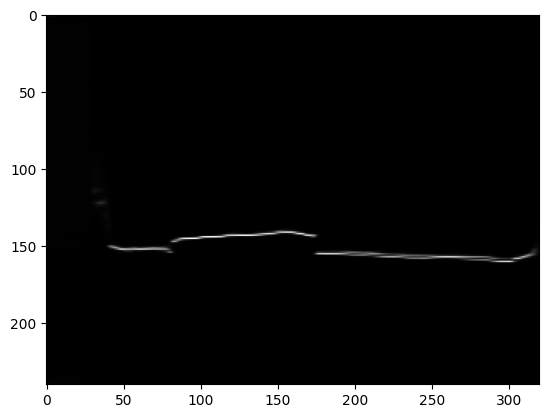

Filename : deploy/input/15-50-44.jpg


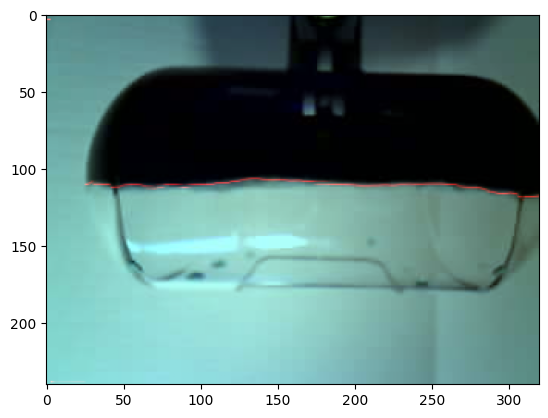

Filename : deploy/input/15-50-43.jpg


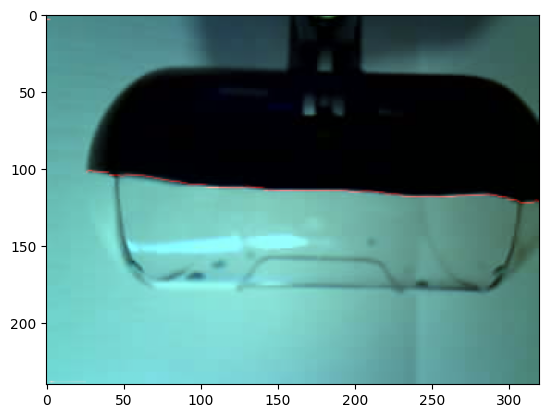

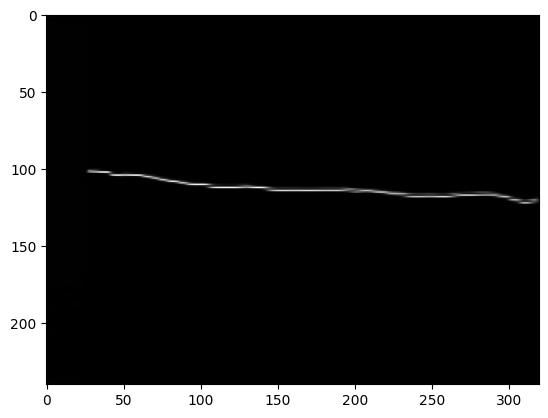

Filename : deploy/input/13-57-19.jpg


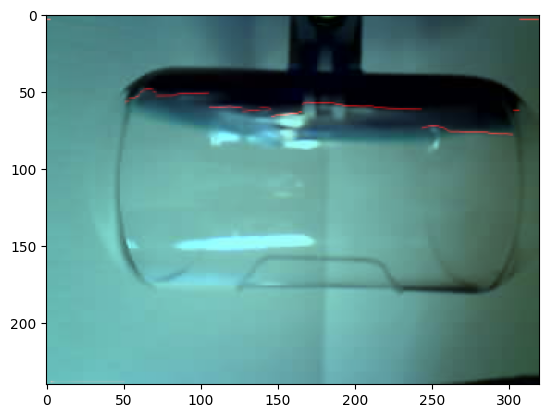

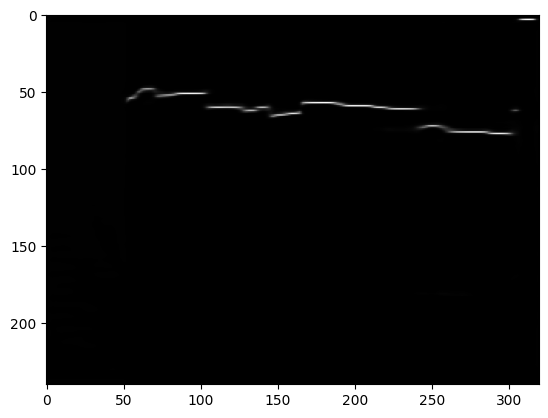

Filename : deploy/input/13-57-10.jpg


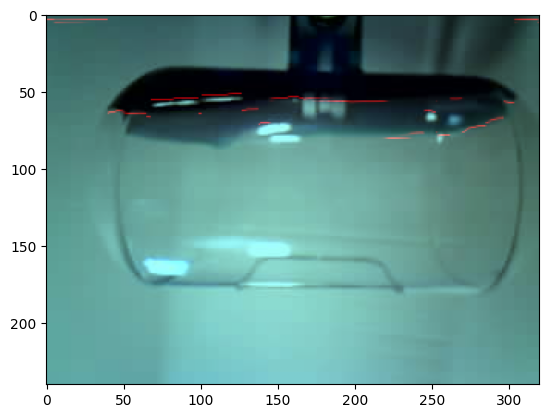

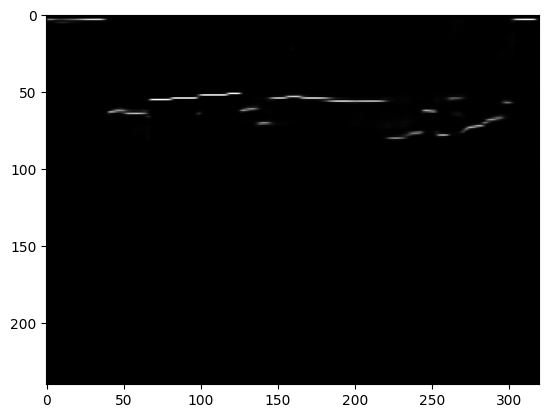

Filename : deploy/input/13-57-17.jpg


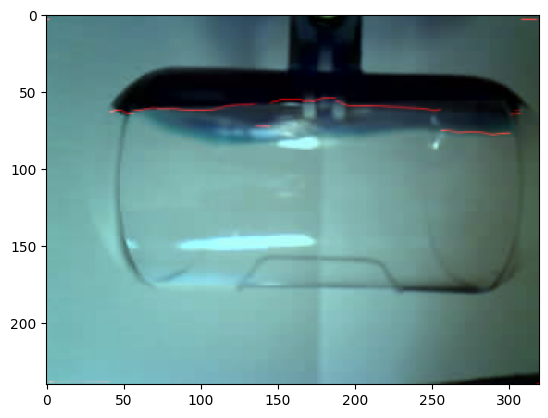

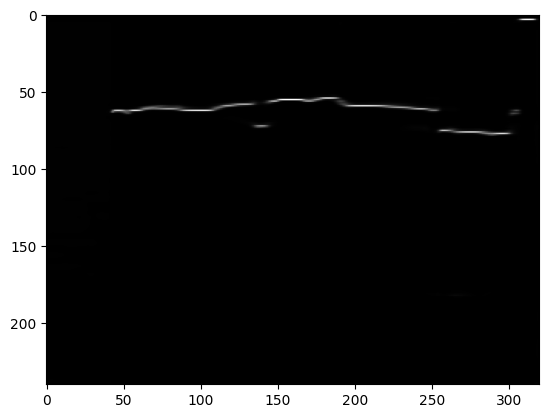

Filename : deploy/input/15-57-25.jpg


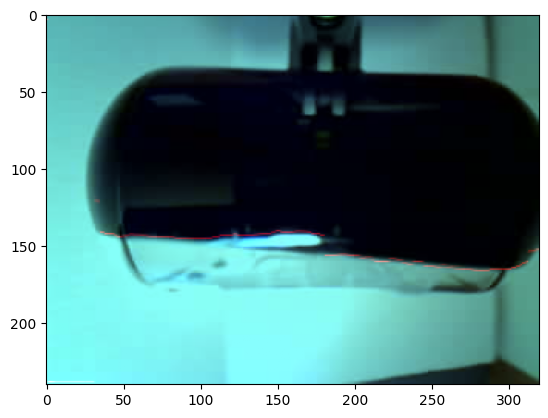

Filename : deploy/input/15-57-22.jpg


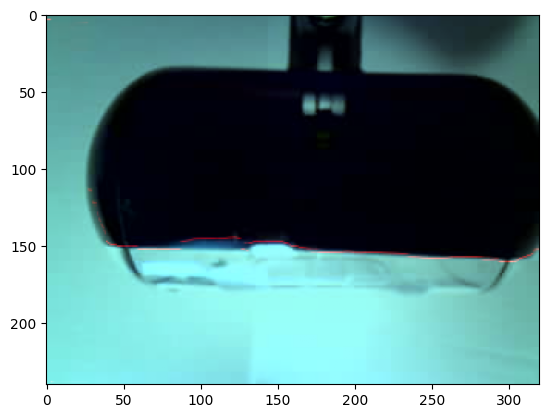

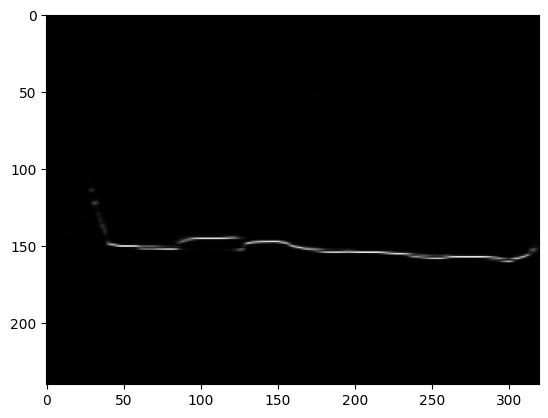

Filename : deploy/input/13-57-16.jpg


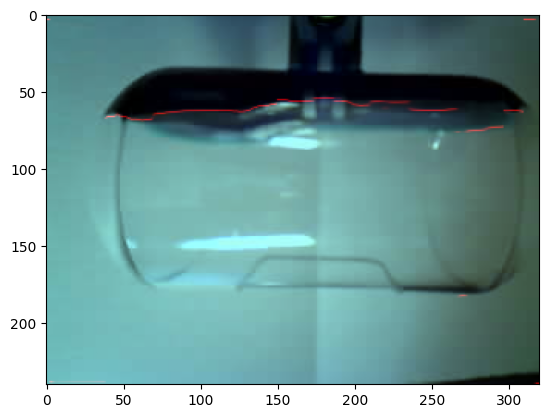

Filename : deploy/input/13-57-11.jpg


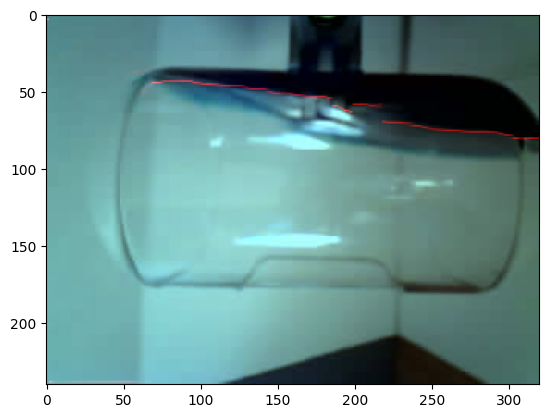

Filename : deploy/input/13-57-18.jpg


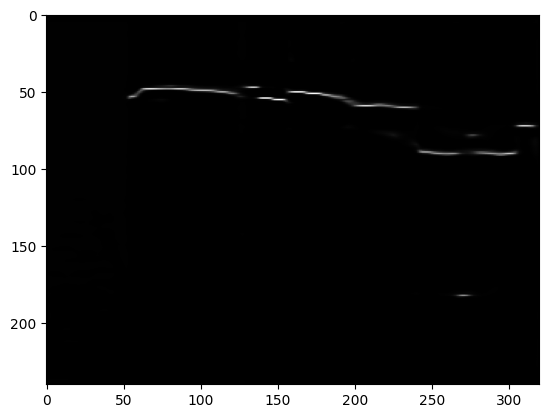

Filename : deploy/input/15-50-42.jpg


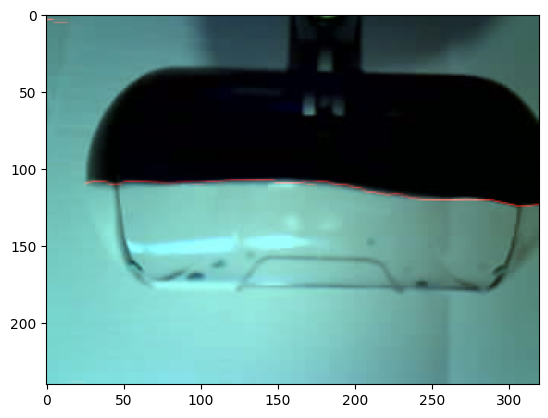

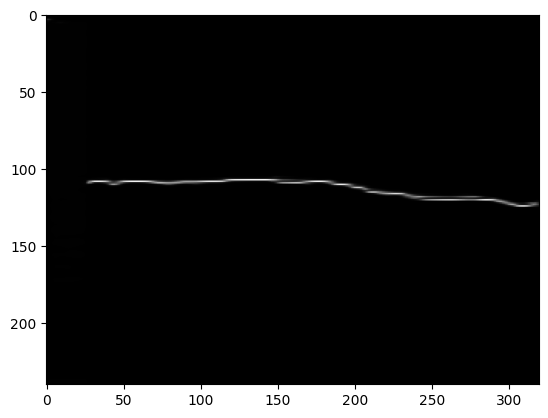

Filename : deploy/input/15-57-32.jpg


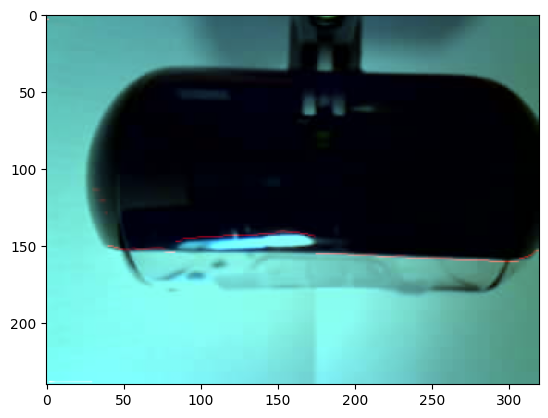

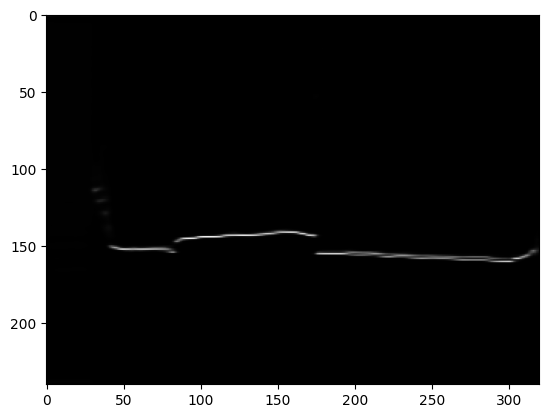

Filename : deploy/input/15-50-39.jpg


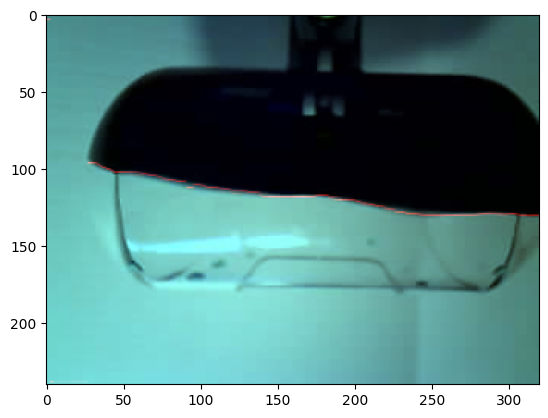

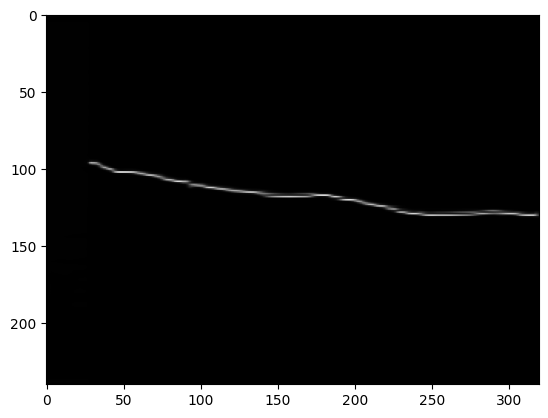

Filename : deploy/input/15-50-45.jpg


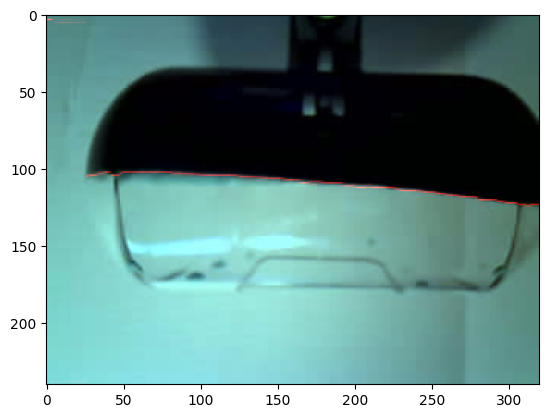

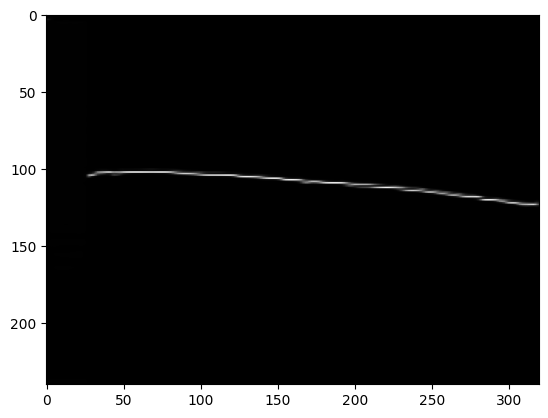

Filename : deploy/input/15-50-37.jpg


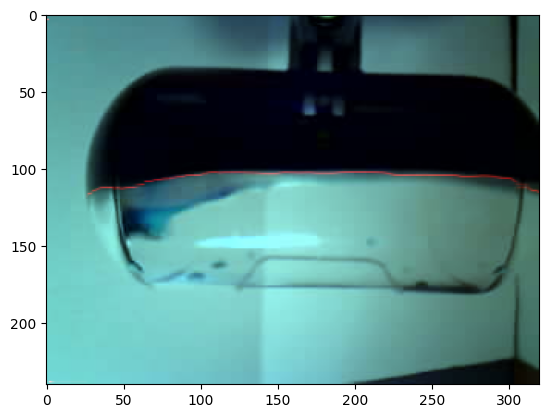

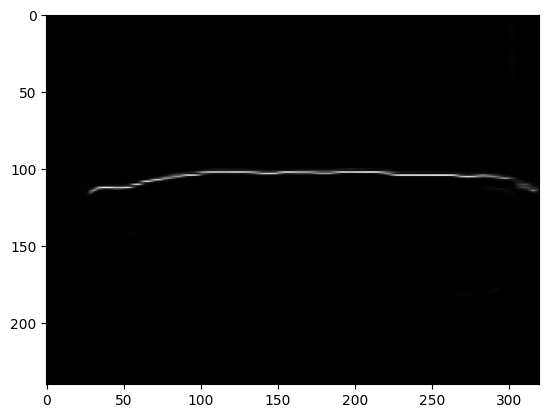

Filename : deploy/input/13-57-23.jpg


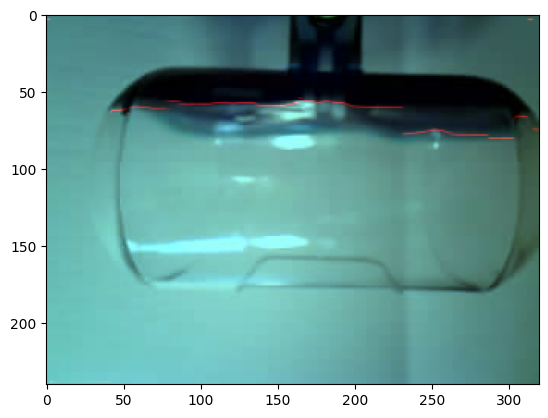

Filename : deploy/input/15-57-23.jpg


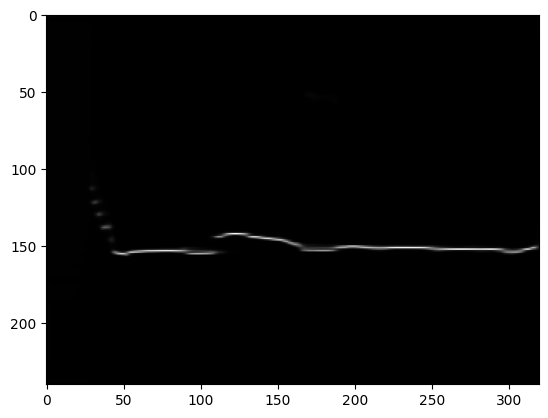

Filename : deploy/input/15-57-24.jpg


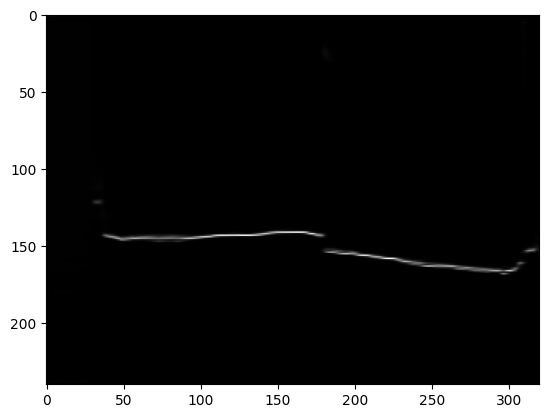

Filename : deploy/input/13-57-09.jpg


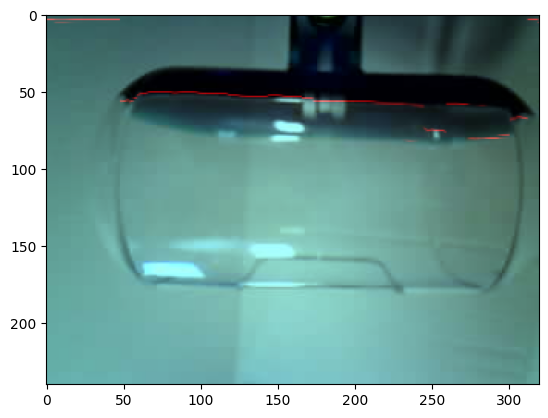

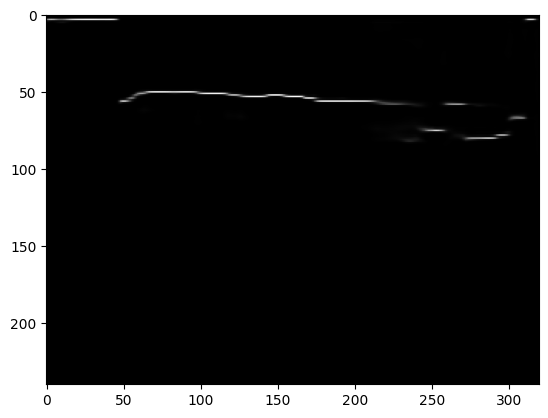

Filename : deploy/input/15-57-29.jpg


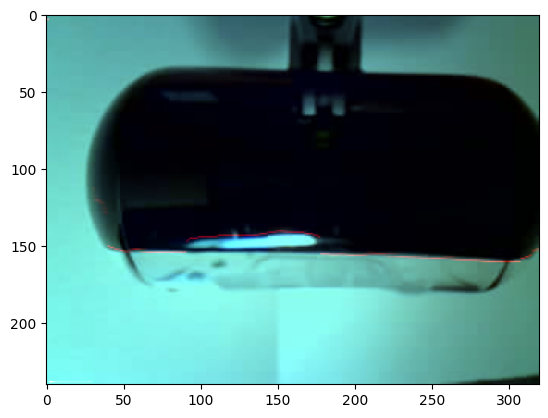

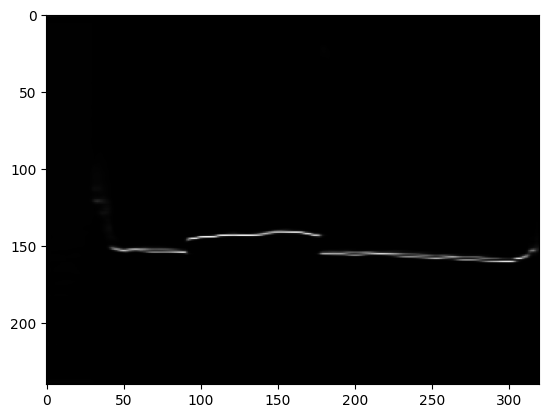

Filename : deploy/input/15-57-27.jpg


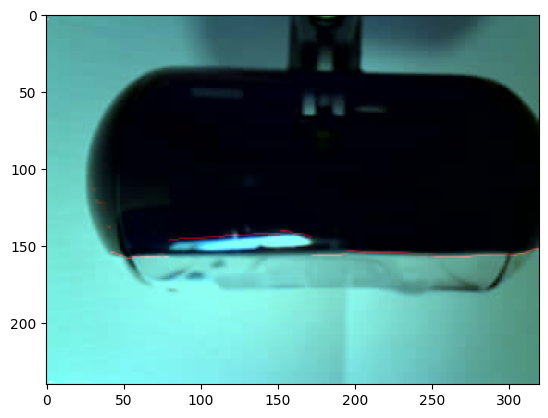

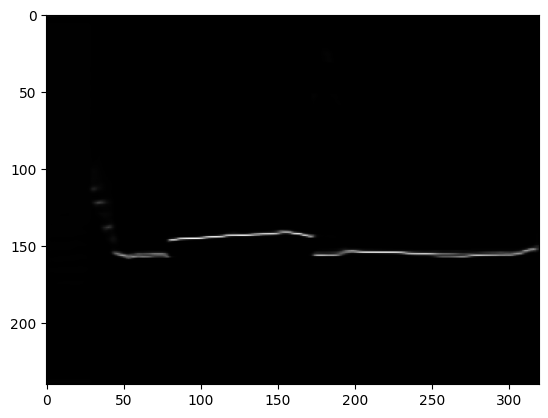

Filename : deploy/input/13-57-12.jpg


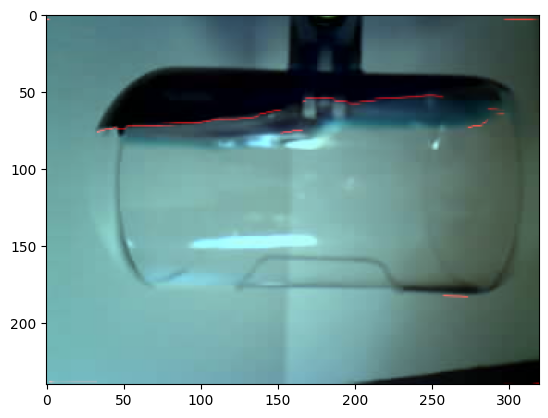

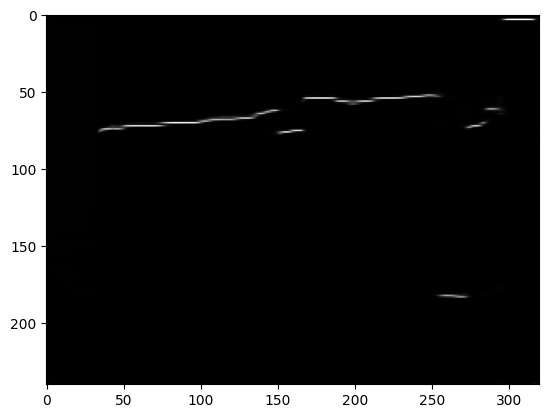

Filename : deploy/input/13-57-15.jpg


Filename : deploy/input/15-57-31.jpg


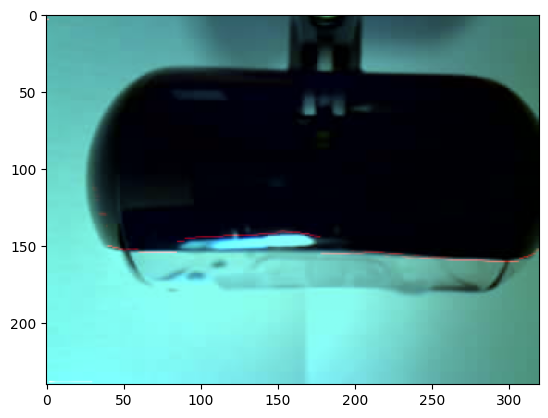

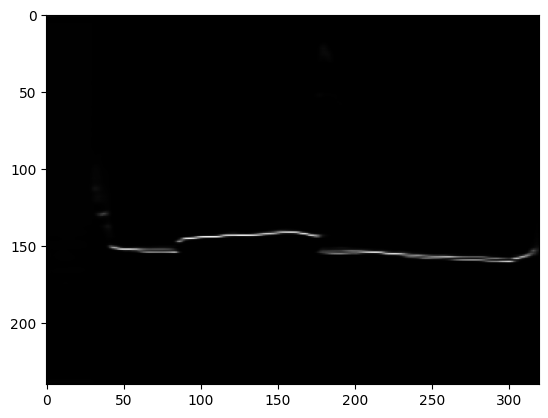

Filename : deploy/input/15-50-46.jpg


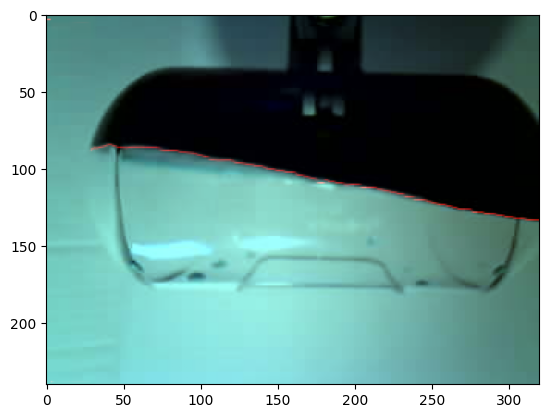

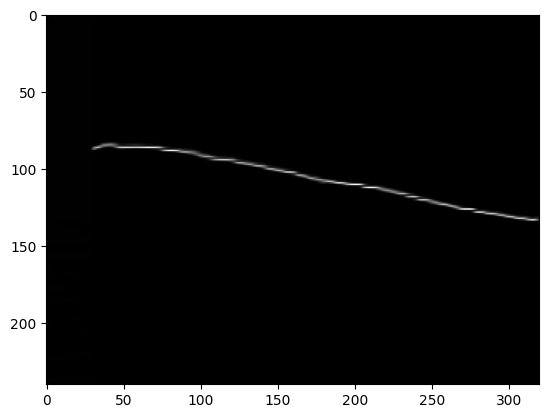

Filename : deploy/input/15-50-41.jpg


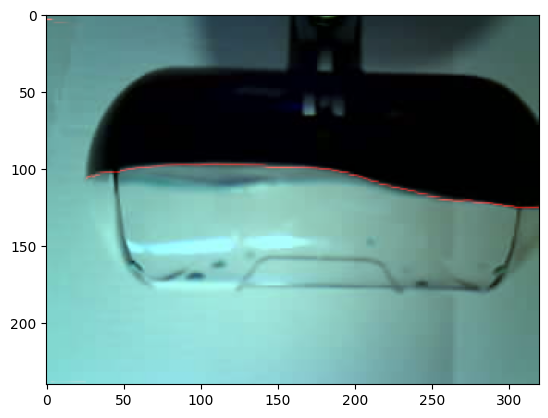

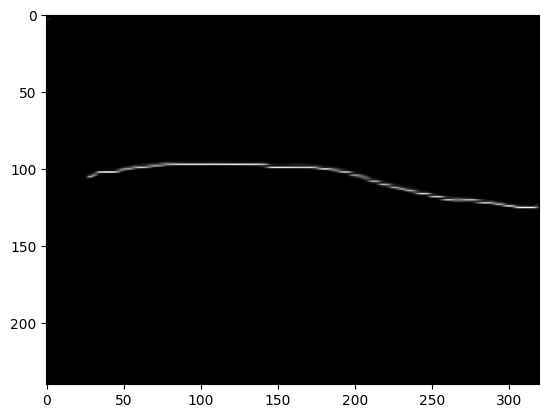

Filename : deploy/input/13-57-20.jpg


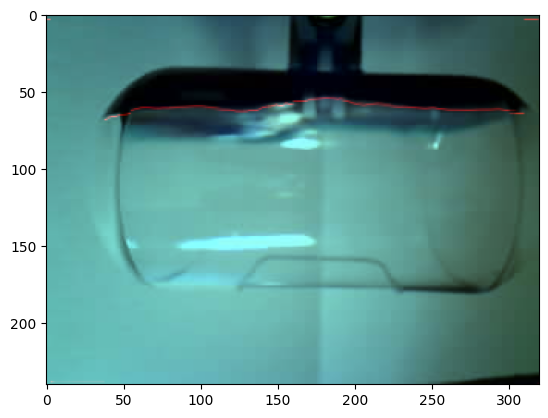

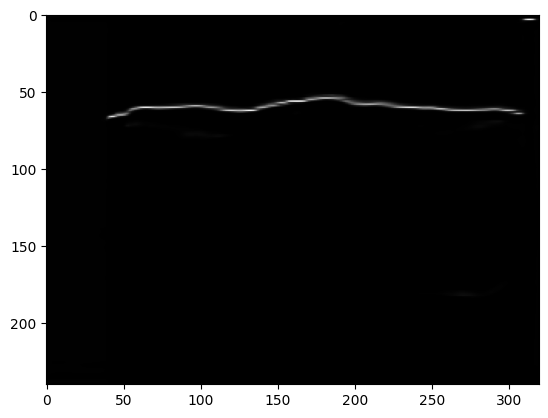

Filename : deploy/input/15-50-33.jpg


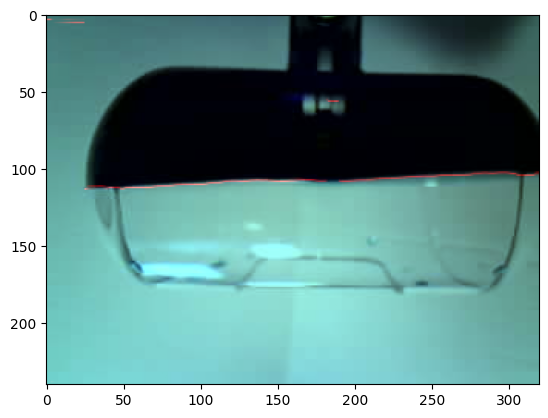

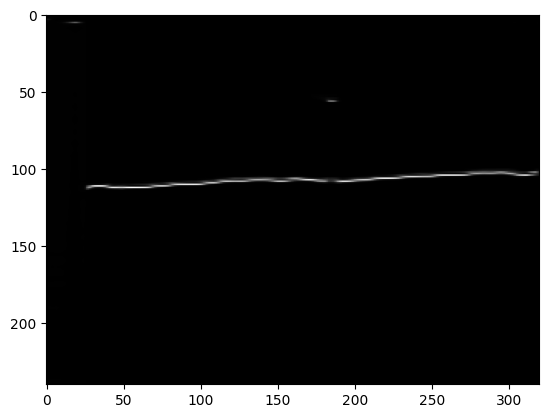

Filename : deploy/input/15-50-34.jpg


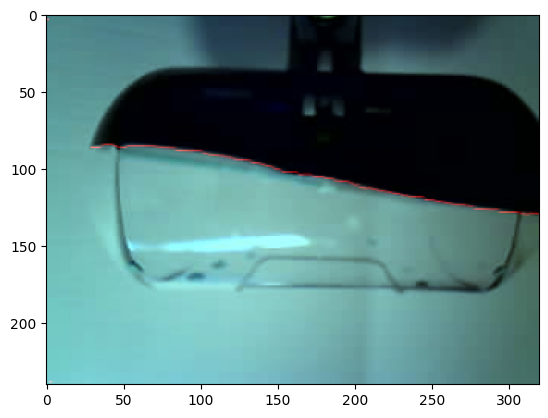

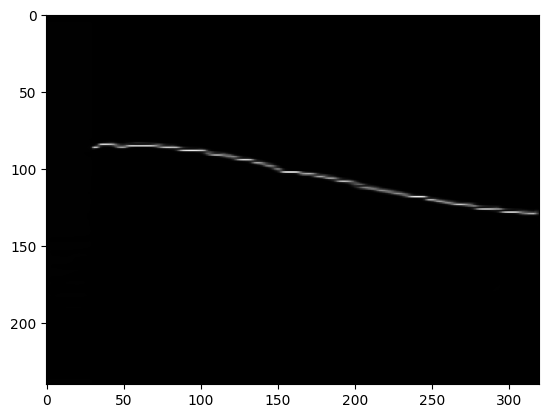

Filename : deploy/input/15-57-21.jpg


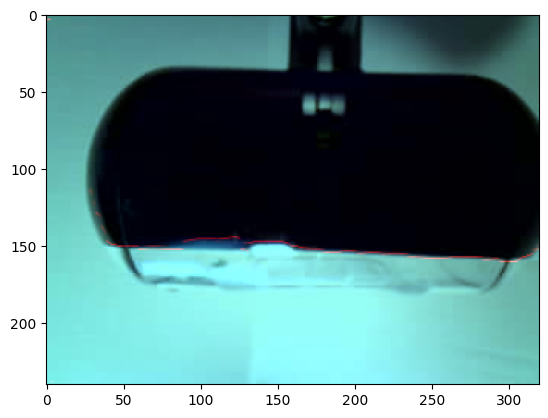

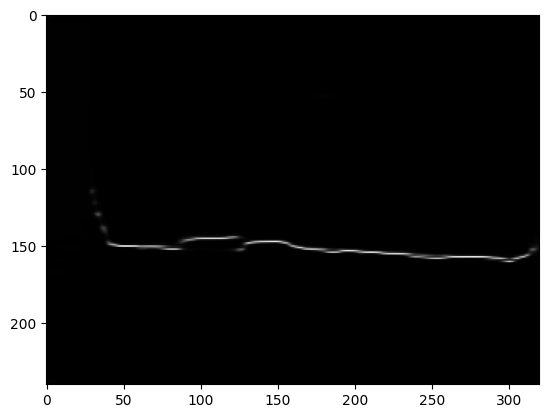

Filename : deploy/input/15-57-26.jpg


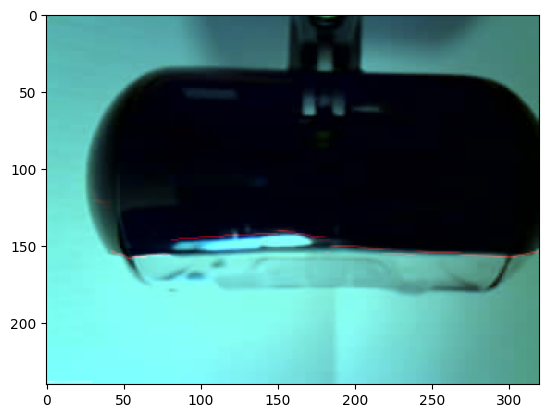

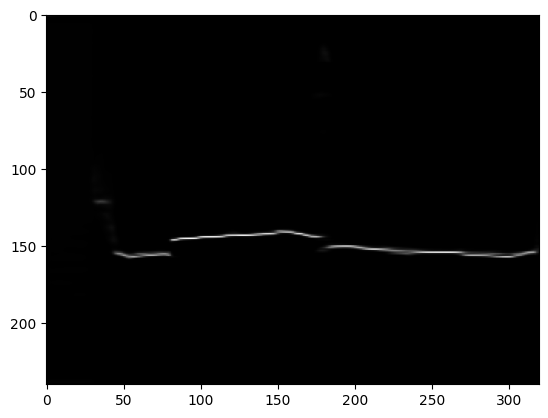

Filename : deploy/input/15-57-28.jpg


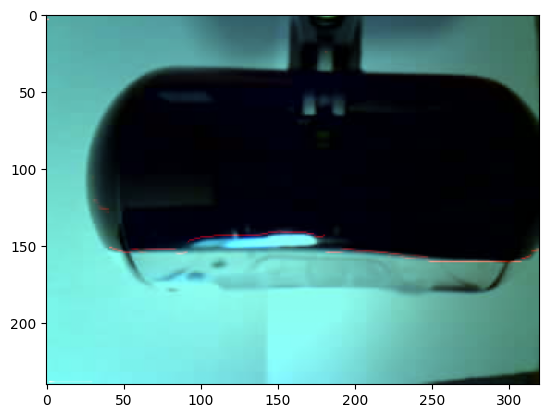

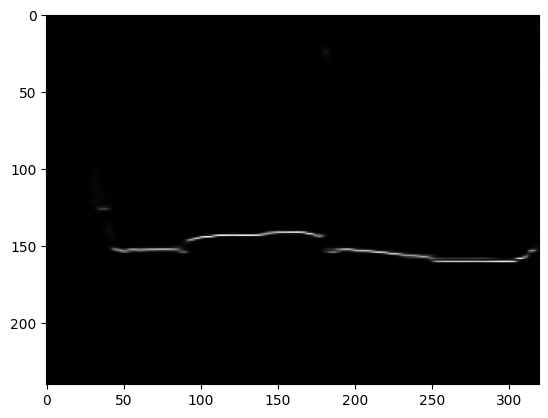

Filename : deploy/input/15-50-35.jpg


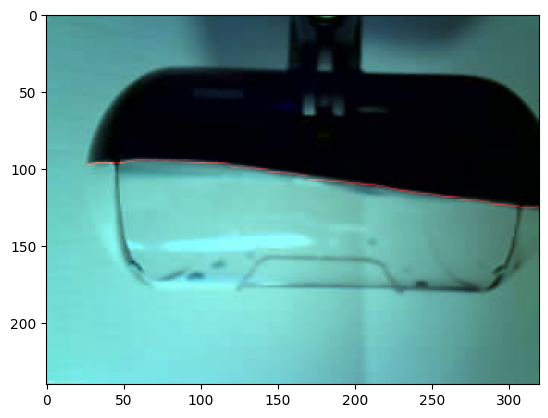

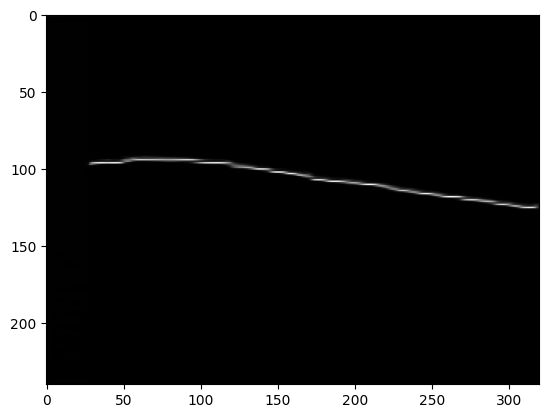

Filename : deploy/input/13-57-21.jpg


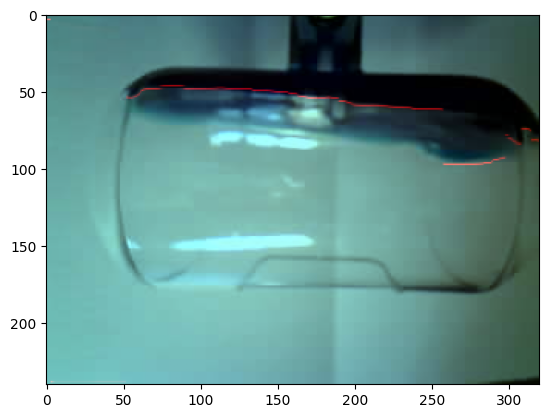

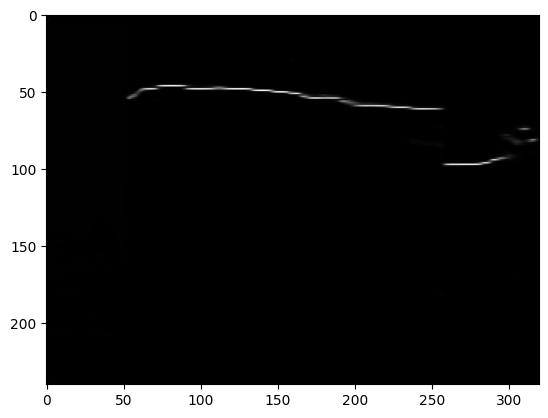

Filename : deploy/input/15-50-32.jpg


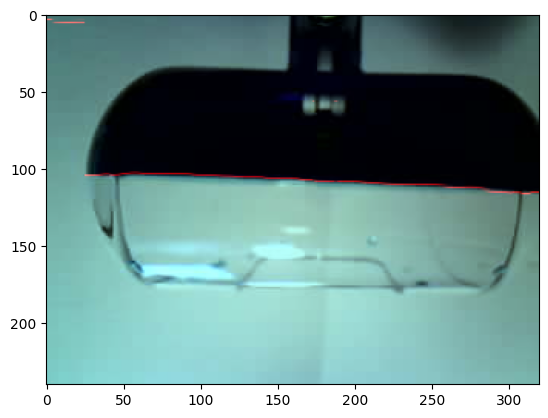

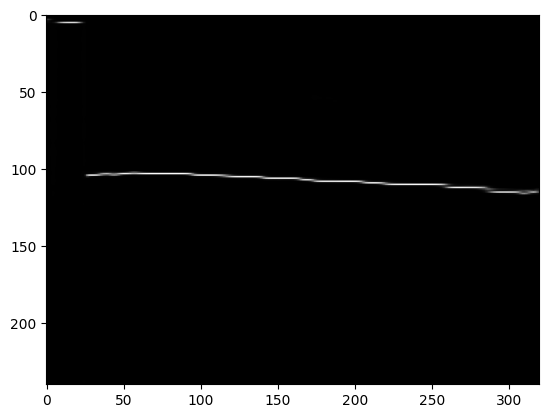

Filename : deploy/input/15-50-40.jpg


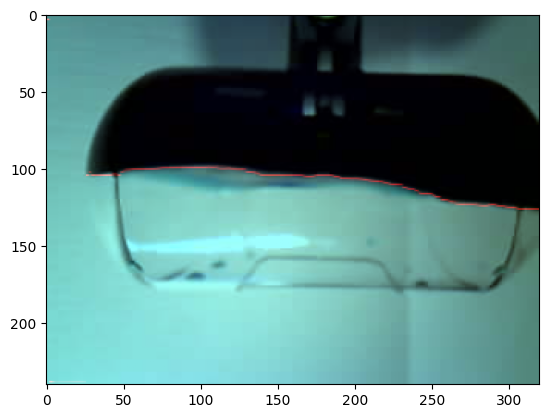

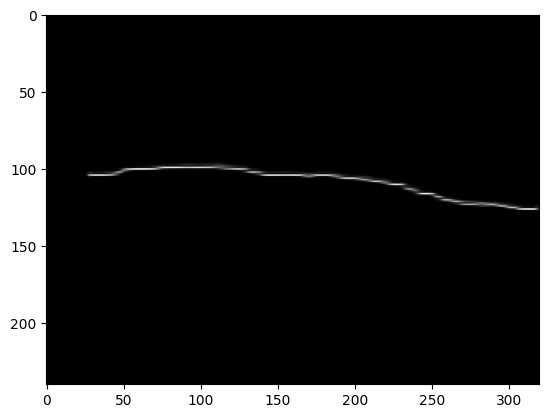

Filename : deploy/input/15-57-30.jpg


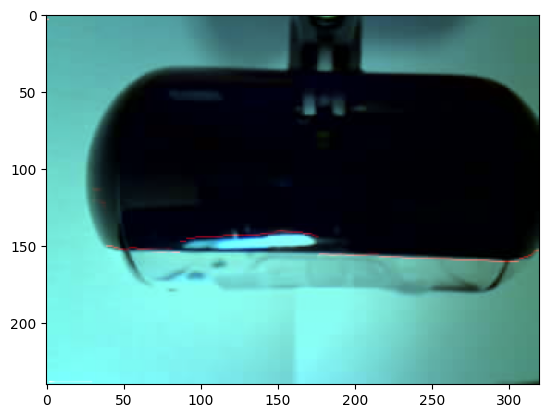

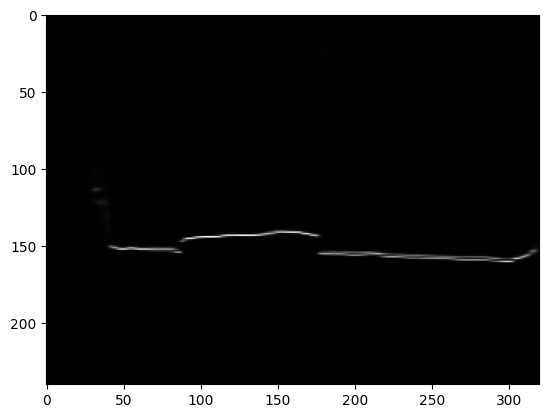

Filename : deploy/input/15-50-47.jpg


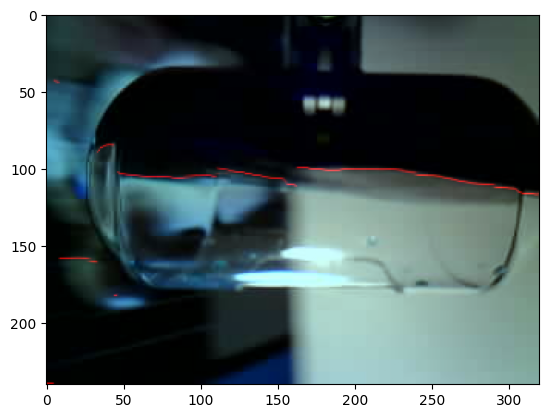

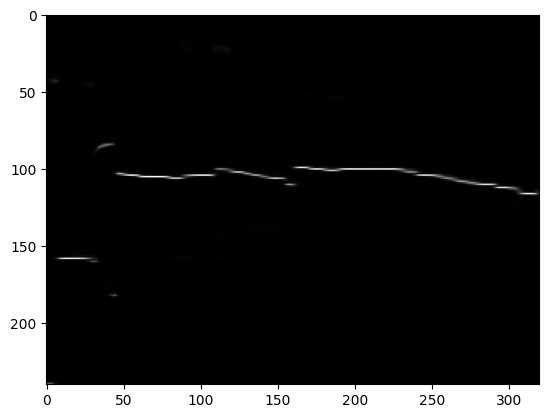

Filename : deploy/input/13-57-14.jpg


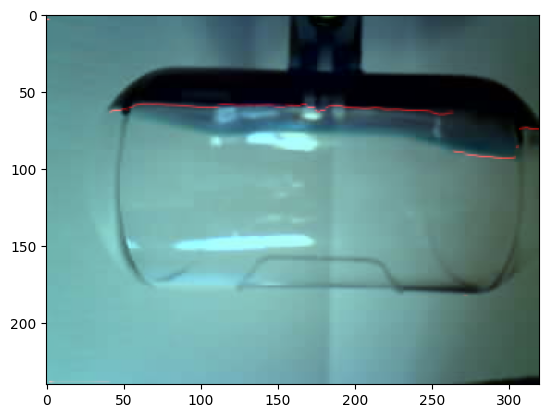

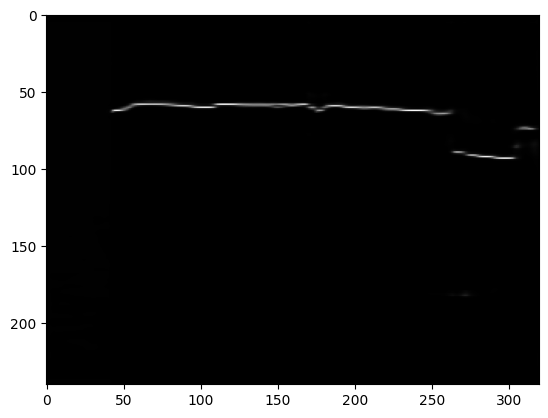

Filename : deploy/input/13-57-13.jpg


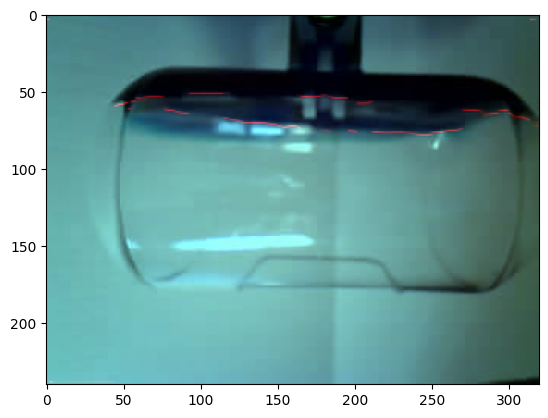

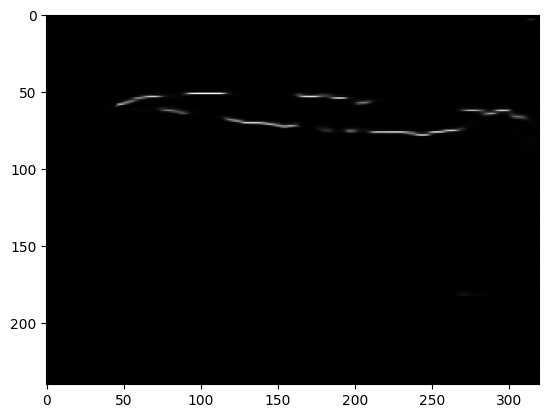

In [3]:
DEPLOY_INPUT_DIR='deploy/input'
DEPLOY_OUTPUT_DIR='deploy/output'
MODEL_PATH = 'data/exps/default_config_epoch_200/model.pt'

os.makedirs(DEPLOY_OUTPUT_DIR,exist_ok=True)

filenames = [os.path.join(DEPLOY_INPUT_DIR,_) for _ in os.listdir(DEPLOY_INPUT_DIR)
           if os.path.isfile(os.path.join(DEPLOY_INPUT_DIR,_)) and _.endswith('.jpg')]

d_imgs,d_ann_imgs = [],[]
for f_ in filenames:
  original = Image.open(f_)
  original = np.asarray(original)
  original = original[:,:,:3]
  
  # Dummy annotation mask, to ensure we only need one Dataset class.
  annotation_mask = np.zeros(original.shape[:2])

  d_imgs.append(original)
  d_ann_imgs.append(annotation_mask)

model = WT3Net(num_channels = 10, filter_size = 7)
model.load_state_dict(torch.load(MODEL_PATH))

transform = ToTensor()


deploy_dataset = WaterLevelDataset(d_imgs,d_ann_imgs,transform = transform)

T = 1e-1
for idx in range(deploy_dataset.__len__()):
  dta = deploy_dataset[idx]
  inputs = dta['input'] 
  targets = dta['target']

  img = inputs.cpu().detach().numpy().transpose((1,2,0))
  outp = F.softmax((model(inputs)/T),dim = 0).cpu().detach().numpy()


  img[:,:,0] +=outp
  img[:,:,0] = img[:,:,0]/img[:,:,0].max()
  base_filename = os.path.basename(filenames[idx])
  print(f'Filename : {filenames[idx]}')
  plt.imshow(img)
  plt.show()
  plt.imsave(os.path.join(DEPLOY_OUTPUT_DIR,f'out_{base_filename}'),img)

  outp = F.softmax(model(inputs),dim = 0).cpu().detach().numpy()
  plt.imsave(os.path.join(DEPLOY_OUTPUT_DIR,f'out_gray_{base_filename}'),outp,cmap='gray')
  plt.imshow(outp,cmap='gray')
  plt.show()

